# Figure 8

Shared active predictor frequency and reduction in the number of active predictors. In the left panel we can see the shared active predictor histograms for the first round, in which the $x$-axis represents the number of agents ($n$) and the $y$-axis represents, for each $n$, the frequency of trials in which $n$ agents used the same active predictor. Each datapoint is one active predictor in the first round of one of the 100 trials of the simulations with $k\,{=}\,1, 12$ (\#datapoints ${=}\,8452$). In the center panel we see the same histograms corresponding to the last round of the simulation (\#datapoints ${=}\,5502$). In the right panel, the $x$-axis is the number of predictors in each agent's pool ($k$) and the $y$-axis is the total number of active predictors in the population in a round.

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('../el_farol')

from main import main
from config import PATHS

In [ ]:
ks = [1,12]
df = main(
    ks=ks,
    ds=[24],
    num_rounds=100,
    num_experiments=100,
    seed=42
)

Running memory sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running predictor sweeps:   0%|          | 0/2 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
ks = [3,6,9]
dfA = main(
    ks=ks,
    ds=[24],
    num_rounds=100,
    num_experiments=100,
    seed=42
)
dfA = pd.concat([dfA, df], ignore_index=True)
# Keep only last 20 rounds
dfA = dfA[dfA['Round'] >= 80]

Running memory sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running predictor sweeps:   0%|          | 0/3 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/100 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/100 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
# Histogram of shared active predictors on the first round for k=1
datosK1 = pd.DataFrame(df[df['Num_predictors'] == 1])
datosK1 = pd.DataFrame(datosK1[datosK1['Round'] == df['Round'].min()])
datosK1 = datosK1.groupby(['Identifier','Round'])['Policy'].value_counts().reset_index(name='Count')
print(f'{datosK1.shape=}')

# Histogram of shared active predictors on the first round for k=12
datosK12 = pd.DataFrame(df[df['Num_predictors'] == 12])
datosK12 = pd.DataFrame(datosK12[datosK12['Round'] == df['Round'].min()])
datosK12 = datosK12.groupby(['Identifier','Round'])['Policy'].value_counts().reset_index(name='Count')
print(f'{datosK12.shape=}')

# Histogram of shared active predictors on the last round for k=1
datosK1_fin = pd.DataFrame(df[df['Num_predictors'] == 1])
datosK1_fin = pd.DataFrame(datosK1_fin[datosK1_fin['Round'] == df['Round'].max()])
datosK1_fin = datosK1_fin.groupby(['Identifier','Round'])['Policy'].value_counts().reset_index(name='Count')
print(f'{datosK1_fin.shape=}')

# Histogram of shared active predictors on the last round for k=12
datosK12_fin = pd.DataFrame(df[df['Num_predictors'] == 12])
datosK12_fin = pd.DataFrame(datosK12_fin[datosK12_fin['Round'] == df['Round'].max()])
datosK12_fin = datosK12_fin.groupby(['Identifier','Round'])['Policy'].value_counts().reset_index(name='Count')
print(f'{datosK12_fin.shape=}')

# Amount of active predictors in a simulation 
dfB = dfA.groupby(['Num_predictors','Identifier','Round'])['Policy'].nunique().reset_index(name='Num_pred_act')
print(f'{dfB.shape=}')

datosK1.shape=(6207, 4)
datosK12.shape=(6235, 4)
datosK1_fin.shape=(6207, 4)
datosK12_fin.shape=(2262, 4)
dfB.shape=(10000, 4)


Text(0.5, 1.0, 'Num. active predictors\nlast 20 rounds')

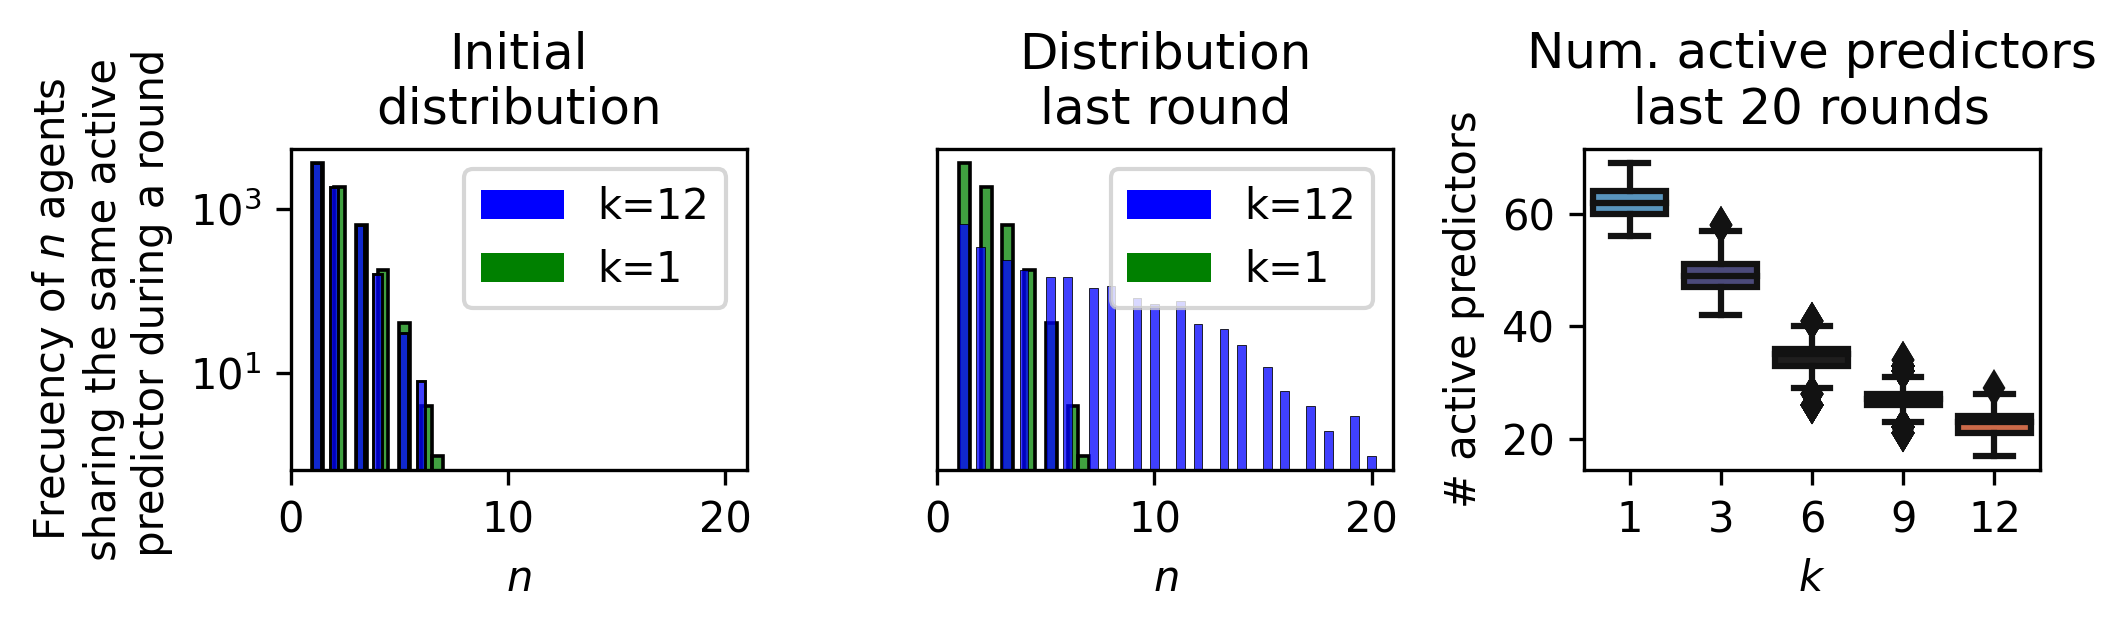

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(7,2.2), tight_layout=True, dpi=300)

color_1 = 'green'
color_12 = 'blue'

# Leftmost plot
sns.histplot(
    datosK1['Count'], 
    ax=ax[0], 
    # bins=50, 
    log_scale=(False, True), 
    binwidth=0.5,
    color=color_1,
    alpha=0.7
)
sns.histplot(
    datosK12['Count'], 
    ax=ax[0], 
    # bins=50, 
    log_scale=(False, True),
    binwidth=0.4,
    color=color_12,
    alpha=0.7
)
topbar = plt.Rectangle((0,0),1,1,fc=color_1, edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc=color_12,  edgecolor='none')
ax[0].legend([bottombar, topbar], ['k=12', 'k=1'], loc='upper right', ncol=1, prop={'size':10})
ax[0].set_xlabel('$n$')
ax[0].set_ylabel('Frecuency of $n$ agents\nsharing the same active\n predictor during a round')
ax[0].set_xlim(0,21)
# ax[0].set_ylim(0,80000)
ax[0].set_title('Initial\ndistribution')

# Center plot
sns.histplot(
    datosK1_fin['Count'], 
    ax=ax[1], 
    bins=50, 
    log_scale=(False, True), 
    binwidth=0.5,
    color=color_1,
)
sns.histplot(
    datosK12_fin['Count'], 
    ax=ax[1], 
    # bins=50, 
    log_scale=(False, True),
    binwidth=0.4,
    color=color_12,
)
topbar = plt.Rectangle((0,0),1,1,fc=color_1, edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc=color_12,  edgecolor = 'none')
ax[1].legend([bottombar, topbar], ['k=12', 'k=1'], loc='upper right', ncol = 1, prop={'size':10})
ax[1].set_xlabel('$n$')
ax[1].set_ylabel('')
ax[1].tick_params(labelleft=False, left=False)
ax[1].set_title('Distribution\nlast round')
ax[1].set_xlim(0,21)
# ax[1].set_ylim(0,80000)

# Rightmost plot
sns.boxplot(
    x='Num_predictors',
    y='Num_pred_act',
    data=dfB,
    ax=ax[2],
    palette='icefire'
)
ax[2].set_xlabel('$k$')
ax[2].set_ylabel('# active predictors')
ax[2].set_title('Num. active predictors\nlast 20 rounds')

In [18]:
file_name = PATHS['folder_figures_for_paper'] / 'Figure8.png'
fig.savefig(file_name, dpi=300, bbox_inches='tight')


---